# Exploratory Data Analysis

The 2 key questions as we conduct an <span style="color: purple"><b>exploratory data analysis</b></span> are as follows:

- What is the **shape of the distribution**?
- Do **outliers** or **skew** exist?

The most significant shape of distributions for introductory statistics is the *normal distribution* since parametric statistical tests like the

- $z$-test,
- $t$-test, and
- ANOVA

are built on assumptions of **normality**. We also need to know whether or not skew and outliers exist because we often must treat skewed data and outliers with care and possibly different tools.

## Types of Data
Data come in two varieties: **quantitative** (numeric) or **qualitative** (categorical) data. Poker player Pete plays Heads Up tournaments with a 20 dollar buy-in (HU20). These two-player tournaments take less than half an hour where he either loses 21, or wins 19. (The online casino takes a cut of each tournament buy-in, called the *rake*.) Pete's HU20 win-loss record is *category data*, a series of W's and L's.

Pete's friend Mandy, a math major with a data science minor at North Georgia, enjoys 6-max NL10, an action-intensive version of No Limit Texas Holdem with a maximum of 6 players at the table rather than the standard 9 or 10 players per table. Mandy's list of winnings from her past twenty cash game sessions is *numeric data*.

For numeric data sets, we have a **sample** of $n$ data points: 

$$\{x_1,x_2,…,x_n\}∈X$$

## Parameters and Statistics

We will continue to emphasize the difference between **parameters** and **statistics**:

$$
\begin{array}{c|cc}
&\text{Population}&\text{Sample}\\ \hline
\text{AVG}&\mu&\bar{x}\\
\text{SD}&\sigma& s\\
\end{array}
$$

### Parameters

The population parameters of mean $\mu$ and standard deviation $\sigma$ are typically the values of greatest interest. Also typically, they are rarely known. Consider a study at UNG Dahlonega where we wish to know the *Perfectionism* levels for undergraduate students. We know little about the overall population parameters but can collect sample data from, say, 200 students to launch our investigation.

```{sidebar} **Law of Large Numbers**
Larger sample sizes lead to increased accuracy of our estimates. We are typically estimating the mean, but the law applies to all parameters we estimate with statistical methods.
```

### Statistics

The sample statistics of mean $\bar x$ and standard deviation $s$ are known and thus can be used to estimate the population parameters. The accuracy of the estimates will depend upon two things, among others:

1. Shape of the data
2. Sample size

The shape of the distribution the data are drawn from matters due to the fact that we handle different distributions in different ways. Larger samples lead to improved accuracy.

```{admonition} Example 1
Recall our data from Example 1 which were winnings and losses from Mandy's 20 most recent poker sessions.
```

<table style="width:60%">
  <tr>
    <td style='text-align:center; vertical-align:middle'>28</td>
    <td style='text-align:center; vertical-align:middle'>11</td>
    <td style='text-align:center; vertical-align:middle'>18</td>
    <td style='text-align:center; vertical-align:middle'>35</td>
    <td style='text-align:center; vertical-align:middle'>36</td>
    <td style='text-align:center; vertical-align:middle'>6</td>
    <td style='text-align:center; vertical-align:middle'>-38</td>
    <td style='text-align:center; vertical-align:middle'>14</td>
    <td style='text-align:center; vertical-align:middle'>-19</td>
    <td style='text-align:center; vertical-align:middle'>43</td>
  </tr>
  <tr>
    <td style='text-align:center; vertical-align:middle'>-14</td>
    <td style='text-align:center; vertical-align:middle'>-30</td>
    <td style='text-align:center; vertical-align:middle'>-16</td>
    <td style='text-align:center; vertical-align:middle'>-25</td>
    <td style='text-align:center; vertical-align:middle'>0</td>
    <td style='text-align:center; vertical-align:middle'>40</td>
    <td style='text-align:center; vertical-align:middle'>16</td>
    <td style='text-align:center; vertical-align:middle'>-79</td>
    <td style='text-align:center; vertical-align:middle'>3</td>
    <td style='text-align:center; vertical-align:middle'>1</td>
  </tr>
</table>

### Concatenation

We use the concatenate function **c** to gather this list of integers into an vector of values as shown below.

In [1]:
W <- c( 28, 11, 18, 35, 36, 6, -38, 14, -19, 43, -14, -30, -16, -25, 0, 40, 16, -79, 3, 11)

The **head** function allows us to preview only a few rows or items in the object $W$.

In [2]:
head(W, 4)

[1] 28 11 18 35

We can calculate and store the mean, standard deviation, and sample size as $m$, $s$, $n$, We use the **length()** function to determine sample size, and we illustrate the **rounding** function along the way:

In [3]:
m <- mean(W)
s <- round(sd(W),2)
n <- length(W)

The **cat** function provides a hybrid of the *concatenation* and *print* functions. We can edit text and include the outputs of variables. Below, the *cat* function organizes our descriptive statistics.

In [4]:
cat ("Descriptive Statistics: \n  mean =", m, "\n  standard deviation =", s, "\n  sample size =", n,"\n\nThe 5-number summary is shown below.")
summary(W)

Descriptive Statistics: 
  mean = 2 
  standard deviation = 30.57 
  sample size = 20 

The 5-number summary is shown below.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -79.00  -16.75    8.50    2.00   20.50   43.00 

## Analysis of Descriptives

The most interesting feature of the descriptive statistics is that the mean and median are quite different. Since the median is $8.5$ and the mean is $2$, their difference is $6.5$ which is about $\frac{1}{4}$ of standard deviation.

In this example, because the mean is significantly less than the median, we anticipate skew to the left and outliers, if present, to be on the left, which brings up the second detail one should notice. There is a much longer tail to the left shown the Five Number Summary. The Lower Quartile spans the interval $(−79,−17.5)$ or more than $60$ units. The upper Quartile spans only $(23,43)$ or $20$ units. This indicates likely skew to left since the lower Quartile range is much larger and hence has more room for outliers.

### Standard Deviation and Outliers

The standard deviation can be thought of as a distance metric specific to the data set. Let’s take a moment to discover why. Given the data set $X=\{1,2,3,6\}$, we have $n=4$ and $\bar x=3$. For any data point, say, $x_1=1$, we can compute the directional distance or **deviation** from the mean:

$$d_i = x_i - \bar x$$

For this example, we have

$$d_1 = 1 -3 = -2$$

For deviations where $x_i<x$ (below average), then $d_i<0$, e.g. a negative deviation. Positive deviations indicate data points that are above average. If we treat the data set $X$ as a column vector $\vec x$ and calculate the deviation for each component, we have the deviation vector:

$$\vec{d_x} = \left(\begin{array}{c}x_1 - \bar x \\x_2 - \bar x \\ \vdots \\ x_n - \bar x \\ \end{array}\right)$$

### Standard Deviation

The idea for the calculation of a **standard distance (or deviation)** beings with an application of the Euclidean distance metric to $\vec{d_x}$ . The magnitude of the deviation vector is given by:

$$\begin{align*}
\left\|\vec{d_x}\right\| &= \sqrt{(-2)^2+(-1)^2+(0)^2+(3)^2} \\
&=\sqrt{14}\\
&\approx 3.742
\end{align*}$$

### Outliers

We have two different ways of checking for outliers:

1. Based upon **mean** and **standard deviation**.
2. Based upon the 5-Number Summary: **Q1**, **Q3**, and **IQR**.

#### Outliers Based upon Meand and Standard Deviation

The basic rule is that any data point more than **2 standard deviations** from the mean will count as an outlier in a small data set where small indicates a sample of $n\leq 200$. For larger sample sizes, a **3 standard deviations** from the mean may be more appropriate. We will create cutoff points above and below mean as follows:

- **Upper Cutoff:** $\bar x + 2s$
- **Lower Cutoff:** $\bar x - 2s$

Any data point above the Upper Cutoff will be counted as an outlier. Any data point below the Lower Cutoff will be counted as an outlier.

#### Outliers Based upon 5-Number Summary

The box plot checks for outliers using fences which are calculated as follows:

- **Upper Fence:** Q3 + 1.5 * IQR
- **Lower Fence:** Q1 - 1.5 * IQR

where the inner quartile range (IQR) is given by:

<center><b>IQR = Q3 - Q1</b></center>

Again, any data points that lie outside or beyond the fences are designated as outliers. The only difference between the two methods is the formula used to calculate the cutoff points.

## Analysis of Shape

### Describing the Distribution of a Quantitative Variable
* Shape: Symmetry or Skew
* Shape: Uniform, Peaks - unimodal, bimodal, others
* Center: Mean and Median
* Spread: Range, IQR, standard deviation
* Outliers

**Run the cell below to see examples of different shape characteristics.**

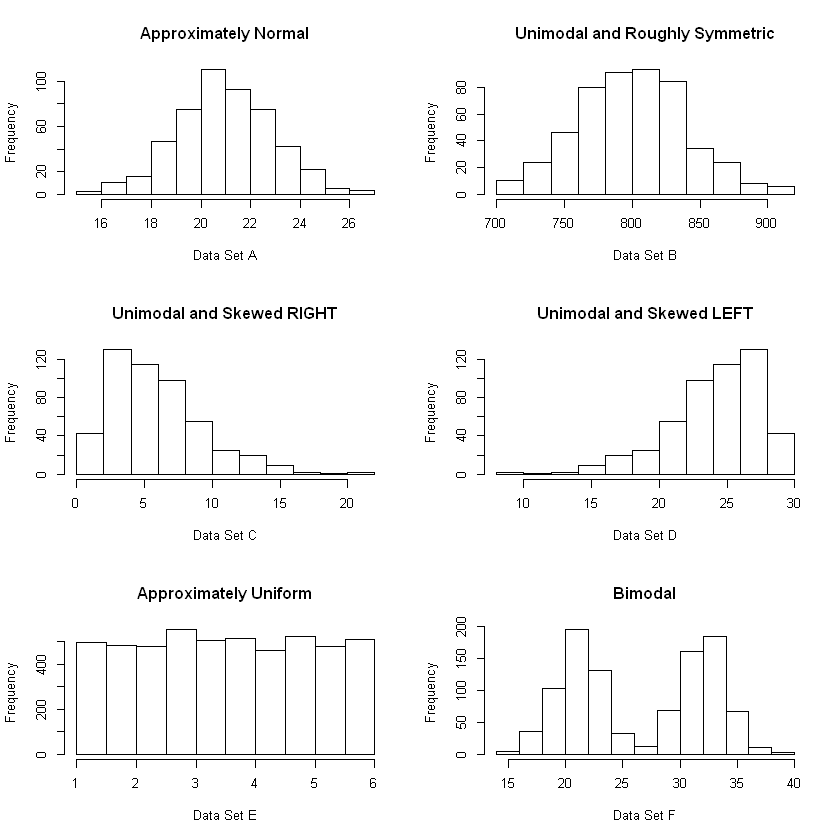

In [7]:
set.seed(844)
setA <- rnorm(500,21,2)
setB <- rchisq(500,df=800)
setC <- rchisq(500,df=6)
setD <- -1*setC+30
setE <- runif(5000,min=1,max=6)
setF <- c(rnorm(500,21,2),rnorm(500,32,2))

par(mfrow=c(3,2))
hist(setA,main="Approximately Normal", xlab="Data Set A")
hist(setB,main="Unimodal and Roughly Symmetric", xlab="Data Set B")
hist(setC,main="Unimodal and Skewed RIGHT", xlab="Data Set C")
hist(setD,main="Unimodal and Skewed LEFT", xlab="Data Set D")
hist(setE,main="Approximately Uniform", xlab="Data Set E")
hist(setF,main="Bimodal", xlab="Data Set F")

## Skew and Outliers

If a distribution has skew, then the majority of outliers in that data set are likely to lie in the same direction. Why do we care?

1. Outliers are called *influential data points* because they affect the **mean**.
2. The **median** is not affected much by outliers.

Thus, in the presence of skew, we can see where the majority of these influential data points are likely to live.

**Example**

Due to the influential data points, e.g. outliers, the following are true:

- If the distribution is skewed left, the **mean** is likely to be **less than the median**.
- If the distribution is skewed right, the **mean** is likely to be **greater than the median**.